# Práctica Nº2

In [1]:
import numpy as np
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec
import plotly.express as px
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression , Ridge , Lasso , RidgeCV, LassoCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_location = "data_practica2.csv"

# Creamos un DataFrame con la info del csv
data= pd.read_csv(data_location, sep = ";", low_memory=False)

In [3]:
data = data.loc[data.Provincia == 'Capital Federal',:]

In [4]:
data = data[['Barrio','Tipo_Propiedad','Precio_Dolares','Metros_Totales','Metros_Cubiertos','Precio_m2_Dls','Amenities_Pileta','Amenities_Balcon']]

In [5]:
data['Precio_m2_Dls']= data['Precio_m2_Dls'].round(2)

In [6]:
data.sample(5)

Barrio Tipo_Propiedad  Precio_Dolares  Metros_Totales  \
25945   Villa Crespo      apartment       169597.03            78.0   
88405   Villa Crespo      apartment       160191.00            56.0   
45882      Balvanera      apartment        75000.00            40.0   
66691  Puerto Madero      apartment       341000.00            47.0   
22102   Villa Crespo      apartment       170000.00           176.0   

       Metros_Cubiertos  Precio_m2_Dls Amenities_Pileta Amenities_Balcon  
25945              72.0        2174.32         no tiene           balcon  
88405              46.0        2860.55         no tiene         no tiene  
45882              40.0        1875.00         no tiene         no tiene  
66691              40.0        7255.32           pileta         no tiene  
22102              76.0         965.91         no tiene         no tiene

In [7]:
data.Tipo_Propiedad.value_counts()

apartment    22593
house         1741
PH            1684
store         1108
Name: Tipo_Propiedad, dtype: int64

In [8]:
data.Barrio.value_counts()

Belgrano           2350
Palermo            2339
Caballito          2009
Villa Urquiza      1337
Recoleta           1243
                   ... 
Velez Sarsfield      37
Agronomía            37
Villa Soldati        14
Villa Riachuelo       5
Catalinas             1
Name: Barrio, Length: 62, dtype: int64

In [9]:
#Se eliminan los barrios que tienen un precio de m2 mayoe a 10000 dólares

mask_precio = data.Precio_m2_Dls > 8000
data.drop(index = data.loc[mask_precio].index ,axis=0,inplace=True)

In [10]:
data.shape

(26618, 8)

In [11]:
data = pd.get_dummies(data,drop_first=True)

In [12]:
data.sample(5)

Precio_Dolares  Metros_Totales  Metros_Cubiertos  Precio_m2_Dls  \
59544        295000.0           102.0             102.0        2892.16   
16047        135000.0            86.0              86.0        1569.77   
7347         520000.0           232.0             220.0        2241.38   
82762        125000.0            54.0              54.0        2314.81   
56532         82000.0            97.0              42.0         845.36   

       Barrio_Agronomía  Barrio_Almagro  Barrio_Balvanera  Barrio_Barracas  \
59544                 0               0                 0                0   
16047                 0               0                 0                0   
7347                  0               0                 0                0   
82762                 0               0                 0                0   
56532                 0               0                 0                0   

       Barrio_Barrio Norte  Barrio_Belgrano  ...  Barrio_Villa Riachuelo  \
59544                    0                0  ...                       0   
16047                    0                0  ...                       0   
7347                     0                0  ...                       0   
82762                    0                0  ...                       0   
56532                    0                0  ...                       0   

       Barrio_Villa Santa Rita  Barrio_Villa Soldati  Barrio_Villa Urquiza  \
59544                        0                     0                     0   
16047                        0                     0                     0   
7347                         0                     0                     0   
82762                        0                     0                     0   
56532                        0                     0                     0   

       Barrio_Villa del Parque  Tipo_Propiedad_apartment  \
59544                        0                         1   
16047                        0                         1   
7347                         0                         0   
82762                        0                         1   
56532                        0                         0   

       Tipo_Propiedad_house  Tipo_Propiedad_store  Amenities_Pileta_pileta  \
59544                     0                     0                        0   
16047                     0                     0                        0   
7347                      1                     0                        0   
82762                     0                     0                        0   
56532                     0                     0                        0   

       Amenities_Balcon_no tiene  
59544                          1  
16047                          1  
7347                           0  
82762                          0  
56532                          1  

[5 rows x 70 columns]

In [13]:
data.columns

Index(['Precio_Dolares', 'Metros_Totales', 'Metros_Cubiertos', 'Precio_m2_Dls',
       'Barrio_Agronomía', 'Barrio_Almagro', 'Barrio_Balvanera',
       'Barrio_Barracas', 'Barrio_Barrio Norte', 'Barrio_Belgrano',
       'Barrio_Boca', 'Barrio_Boedo', 'Barrio_Caballito',
       'Barrio_Capital Federal', 'Barrio_Catalinas',
       'Barrio_Centro / Microcentro', 'Barrio_Chacarita', 'Barrio_Coghlan',
       'Barrio_Colegiales', 'Barrio_Congreso', 'Barrio_Constitución',
       'Barrio_Flores', 'Barrio_Floresta', 'Barrio_Las Cañitas',
       'Barrio_Liniers', 'Barrio_Mataderos', 'Barrio_Monserrat',
       'Barrio_Monte Castro', 'Barrio_Nuñez', 'Barrio_Once', 'Barrio_Palermo',
       'Barrio_Palermo Chico', 'Barrio_Palermo Hollywood',
       'Barrio_Palermo Soho', 'Barrio_Palermo Viejo',
       'Barrio_Parque Avellaneda', 'Barrio_Parque Centenario',
       'Barrio_Parque Chacabuco', 'Barrio_Parque Chas',
       'Barrio_Parque Patricios', 'Barrio_Paternal', 'Barrio_Pompeya',
       'Barrio_Pue

In [14]:
X = data.drop(['Precio_m2_Dls','Precio_Dolares'],axis=1)
y =data['Precio_m2_Dls']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 117)

# Sin regularización

In [16]:
model = LinearRegression()

In [17]:
model_score = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
print ("Train r^2:", model_score.score(X_train, y_train))
print ("Test r^2:",r2_score(y_test,y_pred))

Train r^2: 0.4614001498900777
Test r^2: 0.4513053230987871


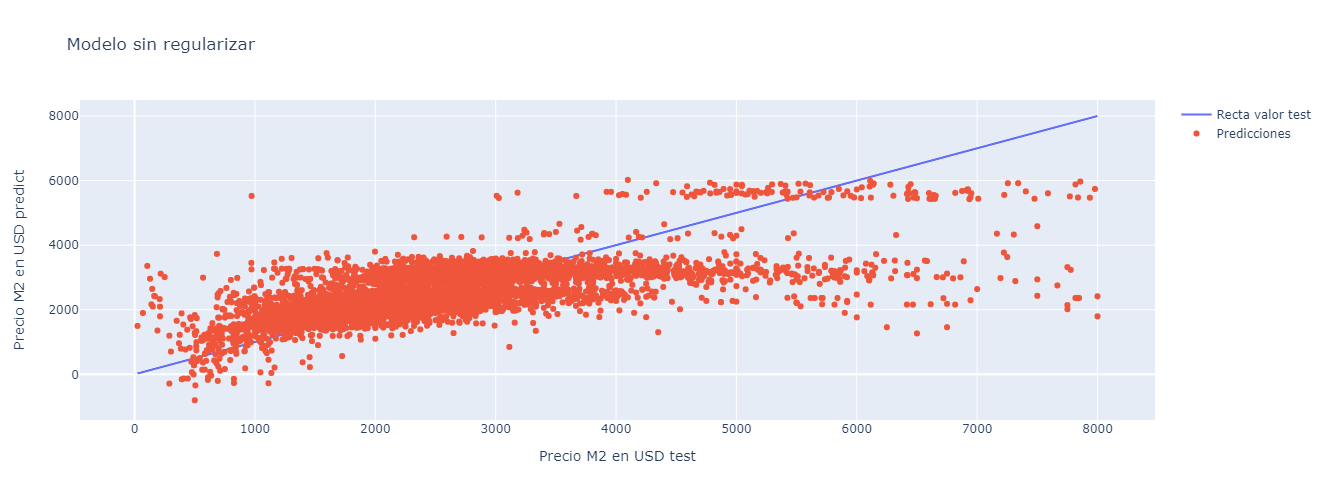

In [19]:
fig = go.Figure()



fig.update_layout(
    autosize=False,
    width=1000,
    height=500,title='Modelo sin regularizar',xaxis_title="Precio M2 en USD test ", 
    yaxis_title="Precio M2 en USD predict")


# Add traces
fig.add_trace(go.Scatter(x=y_test, y=y_test,
                    mode='lines',
                    name='Recta valor test'))

fig.add_trace(go.Scatter(x=y_test, y=y_pred,
                    mode='markers',
                    name='Predicciones',visible=True))
fig.add_contour()

fig.show()

# Regularización Ridge

In [20]:
rlmcv = RidgeCV(alphas=[0.00005], cv=5, normalize=True,scoring='r2')

ridge_model = rlmcv.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print ("Ridge Train r^2:", ridge_model.score(X_train, y_train))
print ("Ridge Test r^2:",r2_score(y_test,y_pred_ridge))

Ridge Train r^2: 0.46139999629350503
Ridge Test r^2: 0.45130256548569847


In [21]:
print('Alfa:',rlmcv.alpha_)

Alfa: 5e-05


In [22]:
print('Coeficientes betas:',rlmcv.coef_)

Coeficientes betas: [-2.40028318e+00  1.08761024e+00 -6.14281432e+01  9.33747367e+01
 -1.50382561e+02 -1.09465849e+02  9.18621322e+02  1.01700886e+03
 -4.33176500e+02  2.19270402e+02  3.46160785e+02  1.90722115e+02
  5.74899843e+02  1.30438306e+02  9.93851684e+01  4.33138386e+02
  4.95998784e+02 -2.04346603e+02 -3.38336941e+02 -2.72344317e+01
 -1.77647474e+02  1.34674126e+03 -9.41048543e+01 -1.98344335e+02
  4.59726116e+01  2.54655308e-01  9.49602499e+02 -7.01183059e+01
  1.13467034e+03  2.26427848e+03  1.06454719e+03  1.06988661e+03
  1.02123026e+03 -3.24199242e+02  2.61410080e+02 -1.47085967e+02
  1.23709238e+02 -2.02271009e+02 -1.37550898e+01 -5.28053246e+02
  3.53428732e+03  1.18691952e+03  8.12278082e+02  2.90774411e+02
  1.06594360e+02  1.34073944e+02  1.97695248e+02 -4.00574363e+01
 -1.48868917e+02  1.60677262e+02  4.33877784e+02  2.42487794e+02
 -5.10883949e+01 -5.62813071e+02  1.79169755e+01  4.03697853e+02
  1.38872251e+02 -1.00230127e+02 -5.20215442e+02  2.63386243e+02
 -9.6

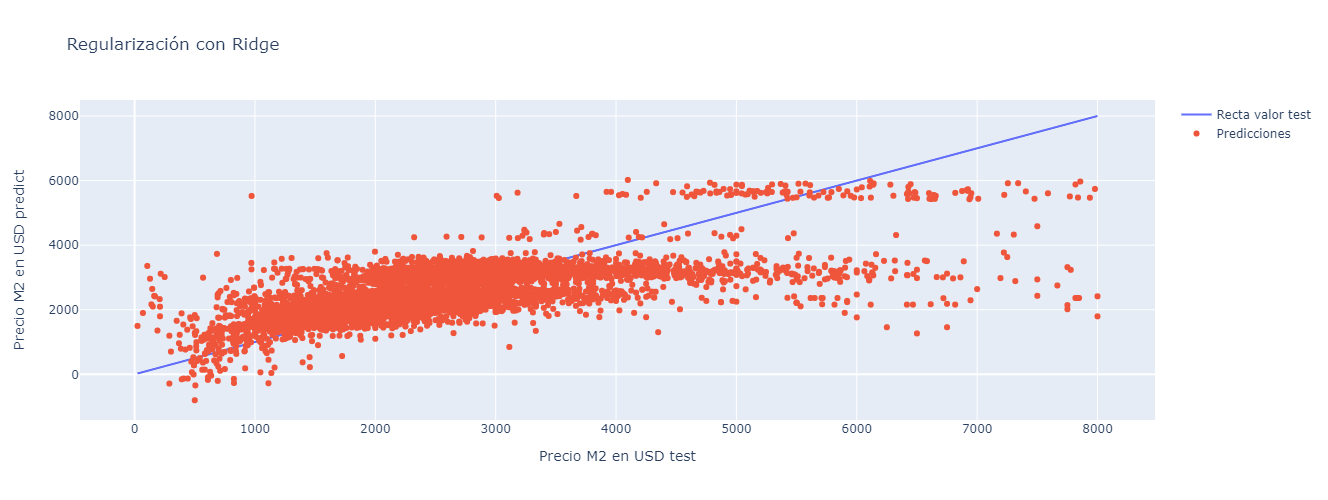

In [23]:
fig = go.Figure()

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,title='Regularización con Ridge',xaxis_title="Precio M2 en USD test ",
    yaxis_title="Precio M2 en USD predict")



# Add traces
fig.add_trace(go.Scatter(x=y_test, y=y_test,
                    mode='lines',
                    name='Recta valor test'))

fig.add_trace(go.Scatter(x=y_test, y=y_pred_ridge,
                    mode='markers',
                    name='Predicciones'))

fig.show()

# Regularización Lasso

In [24]:
lsmcv = LassoCV(alphas=[0.055], cv=5, normalize=True)

lasso_model = lsmcv.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

print ("Lasso Train r^2:", lasso_model.score(X_train, y_train))
print ("Lasso Test r^2:", r2_score(y_test, y_pred_lasso))

Lasso Train r^2: 0.45781364870367103
Lasso Test r^2: 0.44967731586031445


In [25]:
print('Alfa:',lsmcv.alpha_)

Alfa: 0.055


In [26]:
print('Coeficientes betas:',lsmcv.coef_)

Coeficientes betas: [-1.87724469e+00  4.22724237e-01 -4.58770704e+01 -6.76597302e+01
 -3.01384214e+02 -2.43790466e+02  6.81204792e+02  7.93450500e+02
 -5.55746916e+02  0.00000000e+00  1.17684469e+02 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -1.38518374e+01  1.55616309e+02
  2.29454528e+02 -3.31029941e+02 -4.57081518e+02 -1.90196656e+02
 -3.17949911e+02  1.03646696e+03 -2.24189996e+02 -3.32411751e+02
 -9.05698676e+01 -6.06244289e+01  7.05603668e+02 -1.64832462e+02
  9.13767441e+02  1.96533789e+03  8.10577106e+02  7.97414344e+02
  6.19615308e+02 -3.47861255e+02  0.00000000e+00 -2.34610347e+02
 -0.00000000e+00 -3.27766573e+02 -1.17612373e+02 -5.42998882e+02
  3.28538866e+03  9.56750090e+02  5.25305107e+02  3.76447372e+01
 -3.10656281e+01 -0.00000000e+00 -0.00000000e+00 -8.97246239e+01
 -1.55939767e+02 -0.00000000e+00  1.97519822e+02  0.00000000e+00
 -7.96248067e+01 -6.71847643e+02 -1.17330860e+02  8.09290913e+01
 -0.00000000e+00 -1.10459857e+02 -1.36802826e+02  0.00000000e+00
 -8.4

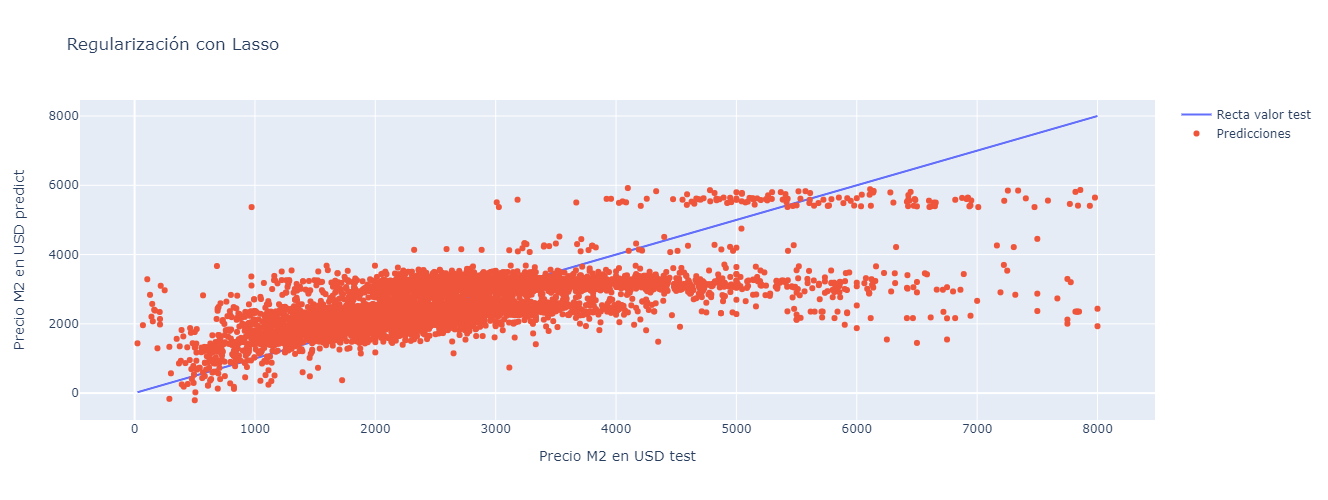

In [27]:
fig = go.Figure()

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,title='Regularización con Lasso',
    xaxis_title="Precio M2 en USD test ", yaxis_title="Precio M2 en USD predict")



# Add traces
fig.add_trace(go.Scatter(x=y_test, y=y_test,
                    mode='lines',
                    name='Recta valor test'))

fig.add_trace(go.Scatter(x=y_test, y=y_pred_lasso,
                    mode='markers',
                    name='Predicciones'))

fig.show()